In [104]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv('CO2_Emissions_Canada.csv')

#duplicated data
df_duplicated = df[df.duplicated() == True]
indexs = df_duplicated.index
for i in indexs:
   df.drop(i, axis = 0,inplace = True)


In [105]:
df_Make=df['Make'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Count'})
df_Make.head(2)


,Make,Count
0,FORD,577
1,CHEVROLET,515


<AxesSubplot:xlabel='Count', ylabel='Make'>

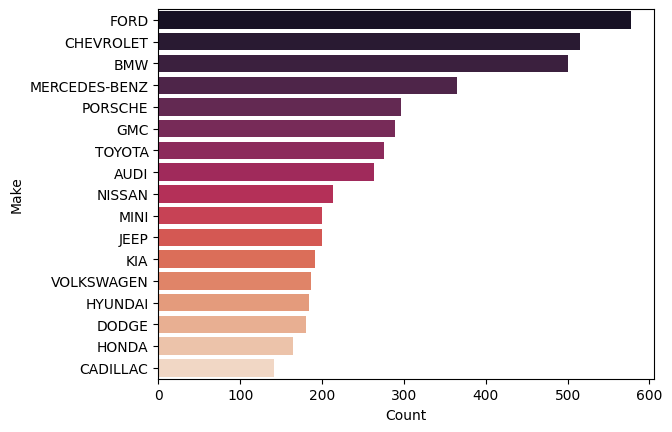

In [106]:
df_Make_x_f= df_Make[0:17]
def colors_from_values(values: pd.Series, palette_name:str, ascending=True):
    '''Returns a seaborn palette reordered by value
    Parameters:
    values: pd.Series
    palette_name:str, Seaborn valid palette name
    ascending: bool, optional color sort order
    '''
    # convert to indices
    values = values.sort_values(ascending=ascending).reset_index()
    indices = values.sort_values(by=values.columns[0]).index
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)
s = df_Make_x_f['Count']
sns.barplot(y='Make',x='Count',data= df_Make_x_f,palette=colors_from_values(s, "rocket_r"))
